**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [ ]:
import keras
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils import plot_model

# Data Preprocessing

11490434/11490434 [==============================] - 0s 0us/step


<ipython-input-3-7ede164fa543>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)


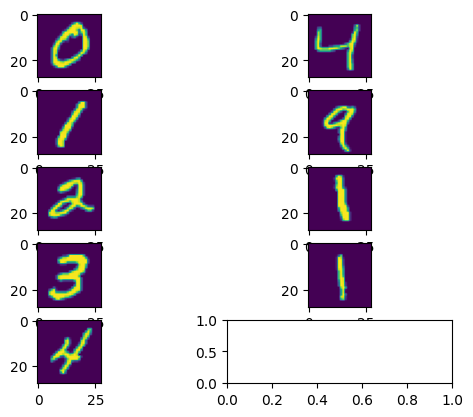

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train= x_train.reshape(60000,28,28)
x_test= x_test.reshape(x_test.shape[0],28,28)
input_shape=(28,28,1)
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

# Build CNN Model

In [ ]:
x_train /= 255
x_test /=255
  #Initialize model here

'''
Define batch size of 64 ,
No of classes (interpret from data)
Train for 5 epochs

'''
batch_size=64
epochs = 5

def build_model(optimizer):
  model = Sequential()
  '''
  Define a sequential model with categorical cross entropy as loss function consisting
  2 convolution and 2 pooling layers with relu as activation function followed by
  droput -> flatten -> dense -> dropout -> dense

  Convolution layer - (kernel size = (3*3))
  Pooling layer - (pool size = (2*2))

  '''
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer=optimizer,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
  model.summary()
  #****** INSERT MODEL CODE HERE ******
  return model

#**** call build model with ADAM and ADAGRAD Optimizer ****
model = build_model('Adam')

plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

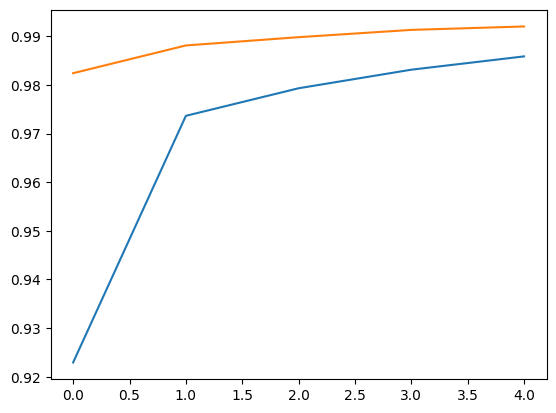

In [ ]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

# Predict Image

1/1 [==============================] - 0s 81ms/step
[[2.5423538e-10 5.2482511e-07 4.0561332e-07 9.3636680e-07 5.5878400e-04
  1.2773055e-05 8.4864046e-11 4.0449677e-08 1.6326254e-05 9.9941027e-01]]
[[0 0 0 0 0 0 0 0 0 1]]


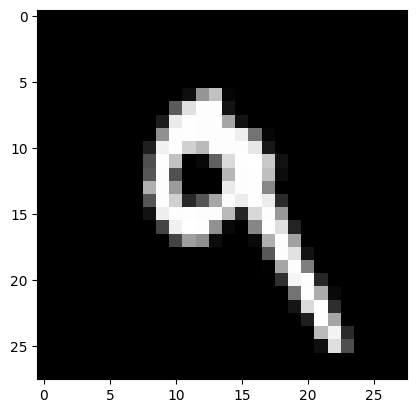

In [ ]:
keras.models.save_model(model, "mnist.h5", save_format="h5")

def predict_image(model, img):
  img = img.reshape(1,28,28)
  predictedValue = model.predict(img,None,'auto',1,None,1,1,False)
  max=-1
  maxIndex=0
  print(predictedValue)
  threshold = 0.5
  binary_predictions = (predictedValue > threshold).astype(int)
  print(binary_predictions)
  '''
  Reshape the image into (1,28,28)
  predict the answer and print it

  '''
  #**** Insert code here ****


m = load_model('/content/mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')
